In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../transactions_train.csv')


In [2]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [3]:
print('Number of rows:', len(df))

Number of rows: 31788324


Text(0, 0.5, 'Count (in Millions)')

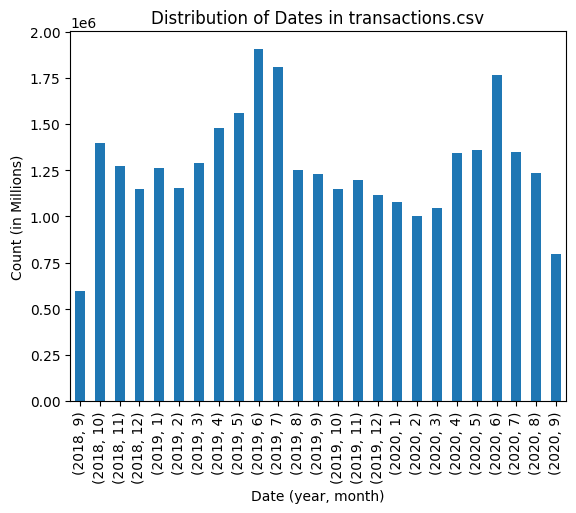

In [4]:
# Distribution of t_dat
date_df = df['t_dat'].astype('datetime64')
data_to_show = date_df.groupby([date_df.dt.year, date_df.dt.month]).count()
ax = data_to_show.plot(kind='bar', title='Distribution of Dates in transactions.csv', )
ax.set_xlabel('Date (year, month)')
ax.set_ylabel('Count (in Millions)')

In [5]:
# Unique customers
unique_cus = df['customer_id'].nunique()
print('Number of unique customers:', unique_cus)
print('Average number of transactions per customer:', len(df)/unique_cus)

Number of unique customers: 1362281
Average number of transactions per customer: 23.334630667241193


What does this chart mean?
 E.g., about 500000 customers in transactions.csv has 0-5 orders in total.


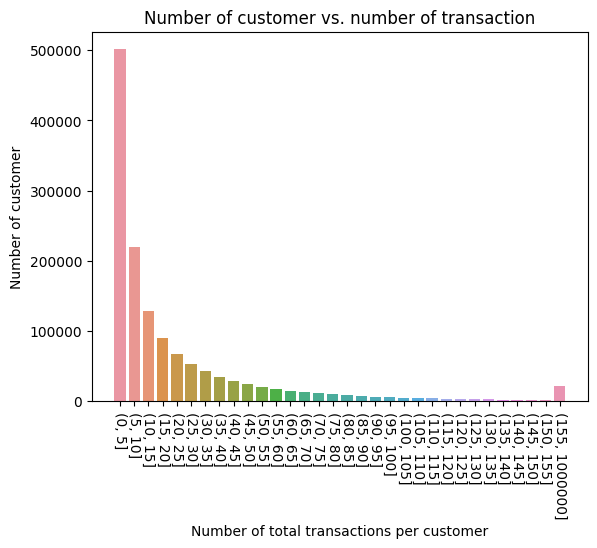

In [6]:
# Distribution of customers vs. transactions

temp = df.groupby(df['customer_id']).count()
temp = temp.rename_axis("c_id").reset_index()
temp = temp[['c_id', 't_dat']]
temp = temp.groupby(temp['t_dat']).count()
temp = temp.rename_axis("x").reset_index()

bins = list(range(0, 160, 5))
bins.append(1000000)
t = temp.groupby(pd.cut(temp['x'], bins=bins)).sum().rename_axis("range").reset_index()

sns.barplot(x='range', y='c_id', data=t)
plt.title('Number of customer vs. number of transaction')
plt.xlabel('Number of total transactions per customer')
plt.ylabel('Number of customer')
plt.xticks(rotation=-90)
plt.plot()

print('What does this chart mean?\n E.g., about 500000 customers in transactions.csv has 0-5 orders in total.')

[]

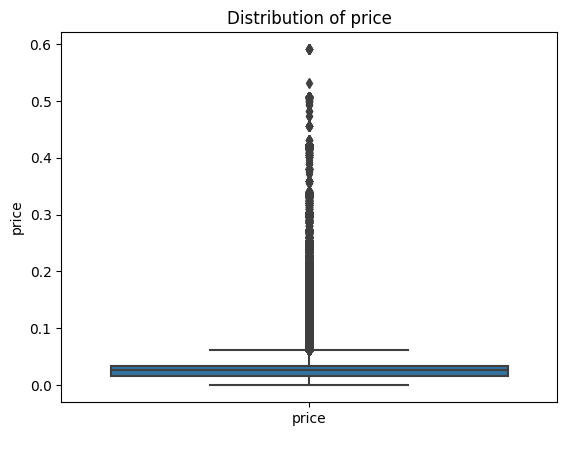

In [7]:
price_df = df['price'].to_frame()
sns.boxplot(data=price_df)
plt.xlabel(' ')
plt.ylabel('price')
plt.title('Distribution of price')
plt.plot()

[]

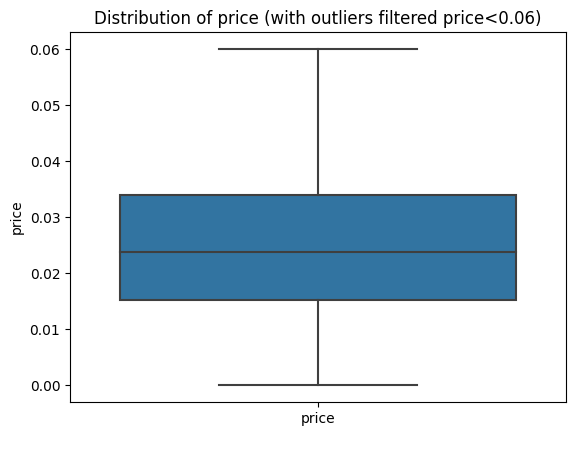

In [8]:
price_df = price_df.loc[price_df['price'] <= 0.06]
sns.boxplot(data=price_df)
plt.xlabel(' ')
plt.ylabel('price')
plt.title('Distribution of price (with outliers filtered price<0.06)')
plt.plot()

In [9]:
channel_df = df[['sales_channel_id', 'customer_id']]
channel_df = channel_df.groupby(['sales_channel_id']).count()

channel_df['customer_id']


sales_channel_id
1     9408462
2    22379862
Name: customer_id, dtype: int64

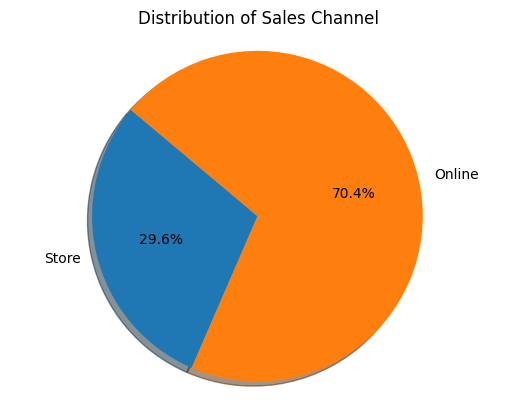

In [10]:
labels = 'Store', 'Online'
sizes = channel_df['customer_id']

plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Distribution of Sales Channel')
plt.axis('equal')
plt.show()